In [155]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [156]:
n_data = pd.read_csv('NOTICES_geocoded.csv')
n_data.head()

,File,Year,Month,DateReceived,DateofNotice,HouseNo,StreetName,ZipCode,Address,City,...,FeatureMatchingHierarchy,TieHandlingStrategyType,FeatureMatchingResultTypeTieBreakingNotes,GeocodeQualityType,FeatureMatchingHierarchyNotes,FeatureMatchingResultTypeNotes,FeatureMatchingResultCount,Latitude,Longitude,MatchType
0,EN-2018-10-B014-0006.pdf,2018,10,43388,43378,24810,Yoshida Dr,94545.0,24810 Yoshida Dr,Oakland,...,FeatureClassBased,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.643428,-122.112715,Relaxed
1,EN-2019-10-B032-0008.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,FeatureClassBased,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed
2,EN-2019-10-B032-0009.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,FeatureClassBased,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed
3,EN-2019-10-B032-0010.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,FeatureClassBased,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed
4,EN-2019-10-B032-0006.pdf,2019,10,43768,43762,720,Marin Ave,94541.0,720 Marin Ave,Oakland,...,FeatureClassBased,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.660659,-122.109158,Relaxed


In [157]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [158]:
geometry = [Point(xy) for xy in zip(n_data.Longitude, n_data.Latitude)]

crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(n_data, crs=crs, geometry=geometry)

,File,Year,Month,DateReceived,DateofNotice,HouseNo,StreetName,ZipCode,Address,City,...,TieHandlingStrategyType,FeatureMatchingResultTypeTieBreakingNotes,GeocodeQualityType,FeatureMatchingHierarchyNotes,FeatureMatchingResultTypeNotes,FeatureMatchingResultCount,Latitude,Longitude,MatchType,geometry
0,EN-2018-10-B014-0006.pdf,2018,10,43388,43378,24810,Yoshida Dr,94545.0,24810 Yoshida Dr,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.643428,-122.112715,Relaxed,POINT (-122.11272 37.64343)
1,EN-2019-10-B032-0008.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed,POINT (-122.07512 37.65948)
2,EN-2019-10-B032-0009.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed,POINT (-122.07512 37.65948)
3,EN-2019-10-B032-0010.pdf,2019,10,43768,43762,825,Orchard Ave,94544.0,825 Orchard Ave,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.659475,-122.075116,Relaxed,POINT (-122.07512 37.65948)
4,EN-2019-10-B032-0006.pdf,2019,10,43768,43762,720,Marin Ave,94541.0,720 Marin Ave,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.660659,-122.109158,Relaxed,POINT (-122.10916 37.66066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,EN-2018-10-B017-0021.pdf,2018,10,43390,43383,535,Liberty Street,94530.0,535 Liberty Street,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.904192,-122.301488,Relaxed,POINT (-122.30149 37.90419)
5287,EN-2019-07-B015-0024.pdf,2019,7,43665,43662,535,Liberty Street,94530.0,535 Liberty Street,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.904192,-122.301488,Relaxed,POINT (-122.30149 37.90419)
5288,EN-2019-08-B024-0013.pdf,2019,8,8/22/19,8/14/19,535,Liberty Street,94530.0,535 Liberty Street,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.904192,-122.301488,Relaxed,POINT (-122.30149 37.90419)
5289,EN-2019-07-B023-0011.pdf,2019,7,7/25/19,7/23/19,11,Seabreeze Dr,94804.0,11 Seabreeze Dr,Oakland,...,ReturnAll,NaN,AddressPoint,NaN,NaN,1,37.909041,-122.341302,Relaxed,POINT (-122.34130 37.90904)


In [160]:
tracts_shp = gpd.read_file('MTC_Communities_of_Concern_2018_with_American_Community_Survey_Data_20122016.dbf')

In [161]:
tracts_shp.drop(['tot_pop_mi',
 'tot_pop_se',
 'tot_pop_po',
 'tot_pop_ci',
 'tot_hh',
 'tot_fam',
 'tot_pop_ov',
 'pop_minori',
 'pop_over75',
 'pop_spfam',
 'pop_lep',
 'pop_below2',
 'pop_disabi',
 'pop_hus_re',
 'pop_zvhhs',
 'pct_over75',
 'pct_minori',
 'pct_spfam',
 'pct_lep',
 'pct_below2',
 'pct_disab',
 'pct_zvhhs',
 'pct_hus_re',
 'minority_h',
 'spfam_half',
 'disab_half',
 'lep_halfsd',
 'below200_h',
 'zvhh_halfs',
 'hus_rent50',
 'count_disa'],axis = 1, inplace = True)

In [162]:
merged = gpd.sjoin(gdf, tracts_shp, how="left", op='within')

In [164]:
notices_per_tract = merged.groupby('tract')['File'].count()
notices_per_tract.name = 'cases_per_tract'
notices_per_tract

tract
379000.0     1
380000.0     1
389100.0     4
400100.0     3
400300.0    70
            ..
436500.0     3
436900.0     1
437200.0     1
600100.0     1
983200.0     1
Name: cases_per_tract, Length: 122, dtype: int64

In [165]:
df_cases = pd.DataFrame(notices_per_tract)
df_cases

,cases_per_tract
tract,
379000.0,1
380000.0,1
389100.0,4
400100.0,3
400300.0,70
...,...
436500.0,3
436900.0,1
437200.0,1


In [166]:
tracts_with_case_count = pd.merge(tracts_shp, df_cases, how='left', on='tract')

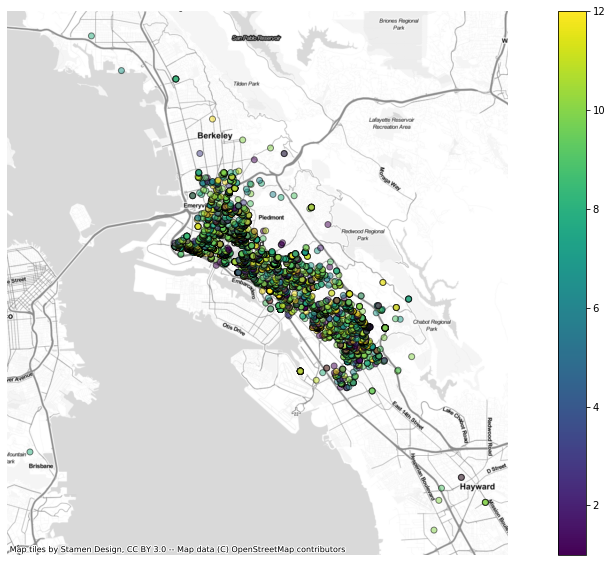

In [167]:
ax = merged_3857.plot(column = 'Month' , legend = True, figsize=(18, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [168]:
import contextily as ctx

In [169]:
merged_3857 = merged.to_crs(epsg=3857)

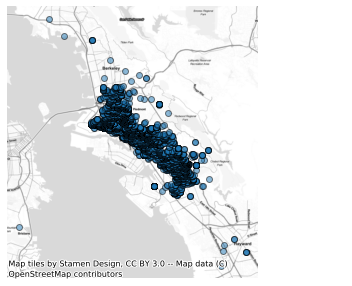

In [170]:
ax = merged_3857.plot(figsize=(5, 5), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [171]:
merged.columns

Index(['File', 'Year', 'Month', 'DateReceived', 'DateofNotice', 'HouseNo',
       'StreetName', 'ZipCode', 'Address', 'City', 'State',
       'PropertyManagementCompany', 'TypeofNotice', 'GroundsforEviction',
       'AUTO_UNIQUE_ID_2020-03-28_colleen_monahan_2000forgeocodi', 'Source',
       'TimeTaken', 'UpdatedGeocoding', 'Version', 'ErrorMessage',
       'TransactionId', 'naaccrQualCode', 'naaccrQualType',
       'FeatureMatchingResultType', 'MatchedLocationType', 'RegionSizeUnits',
       'InterpolationType', 'RegionSize', 'InterpolationSubType',
       'FeatureMatchingGeographyType', 'MatchScore',
       'FeatureMatchingHierarchy', 'TieHandlingStrategyType',
       'FeatureMatchingResultTypeTieBreakingNotes', 'GeocodeQualityType',
       'FeatureMatchingHierarchyNotes', 'FeatureMatchingResultTypeNotes',
       'FeatureMatchingResultCount', 'Latitude', 'Longitude', 'MatchType',
       'geometry', 'index_right', 'objectid', 'county_fip', 'tract', 'geoid',
       'coc_class', 'coc_fl

In [172]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import geoplot
import numpy as np

In [173]:
cont = pd.read_csv('Continuous.csv', converters={'Geo_FIPS': lambda x: int(x)})
cont.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,perc_poc,perc_black,perc_hisp,Change_MedRent,perc_50_ormore,med_income,Perc_SPF,Perc_Fem_SPF,Perc_RentOcc,not,geoid,geoid.1,Perc_ELI,Perc_VLI,Perc_LI
0,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,0.023901,0.107170,6001400100,6001400100,6001400100,0.117965,0.074017,0.091750
1,6001400200,14000US06001400200,Census Tract 4002,0.296811,0.020576,0.110082,326,0.034056,160536,0.039766,0.032749,0.377778,6001400200,6001400200,6001400200,0.080702,0.071345,0.135673
2,6001400300,14000US06001400300,Census Tract 4003,0.308400,0.076000,0.072800,352,0.109827,94732,0.030315,0.023761,0.566981,6001400300,6001400300,6001400300,0.197870,0.114297,0.208521
3,6001400400,14000US06001400400,Census Tract 4004,0.336196,0.059589,0.109290,543,0.191431,113036,0.085714,0.065714,0.626857,6001400400,6001400400,6001400400,0.237143,0.040000,0.182286
4,6001400500,14000US06001400500,Census Tract 4005,0.502113,0.261490,0.088220,360,0.246804,103846,0.043773,0.027127,0.627004,6001400500,6001400500,6001400500,0.225647,0.117139,0.143033


In [253]:
df.groupby('Geo_FIPS')

In [ ]:
#Merging 'merged' and 'cont', I want to lose the merged tracts that are outside of the cont tracts
cont_merged = pd.merge(cont, merged, how='left', on='geoid')
cont_merged.describe()

In [ ]:
tracts_shp['geoid'] = tracts_shp['geoid'].astype(int)
cont_shp = pd.merge(cont, tracts_shp, how="left", on='geoid')
cont_shp.head()

In [ ]:
df = pd.merge(cont, merged, how="left", on='geoid')
df.describe()

In [ ]:
import statsmodels.api as sm # import statsmodels 

In [175]:
#relationship between perc_poc and income

X = df['perc_poc']
Y = df['med_income']

# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             med_income   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                          1.243e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:44:21   Log-Likelihood:                         -62774.
No. Observations:                5282   AIC:                                  1.256e+05
Df Residuals:                    5281   BIC:                                  1.256e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
perc_poc    6.871e+04    616.320    111.479      0.000    6.75e+04    6.99e+04
==============================================================================
Omnibus:                     1376.998   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3888.334
Skew:                           1.367   Prob(JB):                         0.00
Kurtosis:                       6.193   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

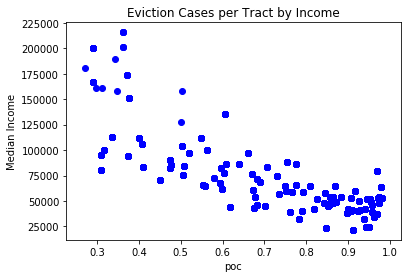

In [176]:
poc = df['perc_poc']
medincome = df['med_income']

plt.scatter(poc, medincome, color='b')
plt.xlabel('poc')
plt.ylabel('Median Income')
plt.title('Eviction Cases per Tract by Income')
plt.show()

tract
379000.0     1
380000.0     1
389100.0     4
400100.0     3
400300.0    70
            ..
436500.0     3
436900.0     1
437200.0     1
600100.0     1
983200.0     1
Name: cases_per_tract, Length: 122, dtype: int64

,cases_per_tract
tract,
379000.0,1
380000.0,1
389100.0,4
400100.0,3
400300.0,70


In [197]:
cont_centrodata = pd.merge(cont, df, left_on='geoid', right_on= 'geoid')
cont_centrodata

,Geo_FIPS_x,Geo_GEOID_x,Geo_NAME_x,perc_poc_x,perc_black_x,perc_hisp_x,Change_MedRent_x,perc_50_ormore_x,med_income_x,Perc_SPF_x,...,MatchType,geometry,index_right,objectid,county_fip,tract,coc_class,coc_flag,Shape__Are,Shape__Len
0,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Relaxed;Soundex,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
1,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Exact,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
2,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Relaxed;Soundex,POINT (-122.23227 37.86437),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
3,6001400200,14000US06001400200,Census Tract 4002,0.296811,0.020576,0.110082,326,0.034056,160536,0.039766,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6001400300,14000US06001400300,Census Tract 4003,0.308400,0.076000,0.072800,352,0.109827,94732,0.030315,...,Exact,POINT (-122.26307 37.83802),473.0,474.0,1.0,400300.0,NA,0.0,0.000113,0.056087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.29126 37.80883),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5408,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.29143 37.80887),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5409,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Relaxed,POINT (-122.28659 37.80935),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5410,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.28686 37.81008),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406


In [205]:
cases_per_tract = merged.groupby('tract')['File'].count()
cases_per_tract.name = 'cases_per_tract'
cases_per_tract

tract
379000.0     1
380000.0     1
389100.0     4
400100.0     3
400300.0    70
            ..
436500.0     3
436900.0     1
437200.0     1
600100.0     1
983200.0     1
Name: cases_per_tract, Length: 122, dtype: int64

In [206]:
df_cases = pd.DataFrame(cases_per_tract)
df_cases.head()


,cases_per_tract
tract,
379000.0,1
380000.0,1
389100.0,4
400100.0,3
400300.0,70


In [207]:
cont_with_casecount = pd.merge(cont_centrodata, df_cases, how='left', on='tract')


,Geo_FIPS_x,Geo_GEOID_x,Geo_NAME_x,perc_poc_x,perc_black_x,perc_hisp_x,Change_MedRent_x,perc_50_ormore_x,med_income_x,Perc_SPF_x,...,geometry,index_right,objectid,county_fip,tract,coc_class,coc_flag,Shape__Are,Shape__Len,cases_per_tract
0,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286,3.0
1,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286,3.0
2,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,POINT (-122.23227 37.86437),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286,3.0
3,6001400200,14000US06001400200,Census Tract 4002,0.296811,0.020576,0.110082,326,0.034056,160536,0.039766,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6001400300,14000US06001400300,Census Tract 4003,0.308400,0.076000,0.072800,352,0.109827,94732,0.030315,...,POINT (-122.26307 37.83802),473.0,474.0,1.0,400300.0,NA,0.0,0.000113,0.056087,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,POINT (-122.29126 37.80883),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406,186.0
5408,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,POINT (-122.29143 37.80887),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406,186.0
5409,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,POINT (-122.28659 37.80935),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406,186.0
5410,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,POINT (-122.28686 37.81008),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406,186.0


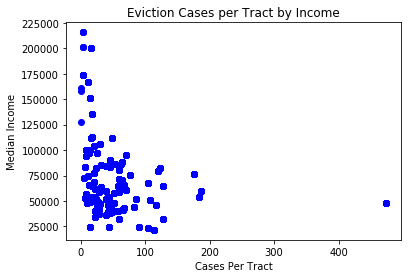

In [209]:
cases = cont_with_casecount['cases_per_tract']
medincome = cont_with_casecount['med_income_x']

plt.scatter(cases, medincome, color='b')
plt.xlabel('Cases Per Tract')
plt.ylabel('Median Income')
plt.title('Eviction Cases per Tract by Income')
plt.show()

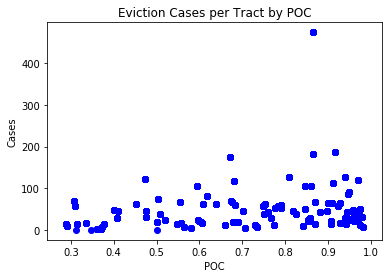

In [212]:
cases = cont_with_casecount['cases_per_tract']
poc = cont_with_casecount['perc_poc_x']

plt.scatter(poc, cases, color='b')
plt.xlabel('POC')
plt.ylabel('Cases')
plt.title('Eviction Cases per Tract by POC')
plt.show()

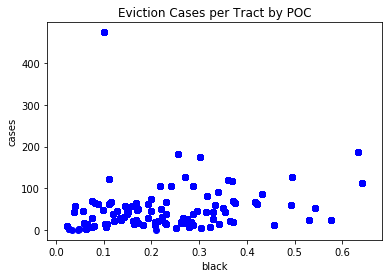

In [213]:
cases = cont_with_casecount['cases_per_tract']
black = cont_with_casecount['perc_black_x']

plt.scatter(black, cases, color='b')
plt.xlabel('black')
plt.ylabel('cases')
plt.title('Eviction Cases per Tract by POC')
plt.show()

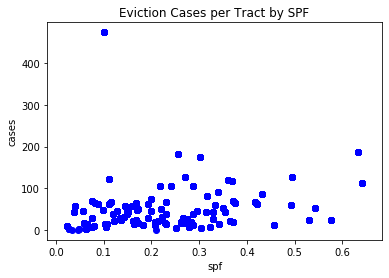

In [214]:
cases = cont_with_casecount['cases_per_tract']
spf = cont_with_casecount['Perc_SPF_x']

plt.scatter(black, cases, color='b')
plt.xlabel('spf')
plt.ylabel('cases')
plt.title('Eviction Cases per Tract by SPF')
plt.show()




In [240]:
cont_with_casecount['cases_per_tract']

0       None
1       None
2       None
3       None
4       None
        ... 
5407    None
5408    None
5409    None
5410    None
5411    None
Name: cases_per_tract, Length: 5412, dtype: object

In [218]:
ro = pd.read_csv ('PercentRenterOccupied2018.csv')
ro

,Geo_FIPS,Geo_GEOID,Geo_NAME,TotalUnits,SE_A10060_002,RenterOcc,Perc_Rent,PercRent_dummy
0,6001400100,14000US06001400100,Census Tract 4001,1297,1158,139,0.107170,0
1,6001400200,14000US06001400200,Census Tract 4002,855,532,323,0.377778,0
2,6001400300,14000US06001400300,Census Tract 4003,2441,1057,1384,0.566981,1
3,6001400500,14000US06001400500,Census Tract 4005,1622,605,1017,0.627004,1
4,6001400700,14000US06001400700,Census Tract 4007,1947,770,1177,0.604520,1
...,...,...,...,...,...,...,...,...
94,6001410100,14000US06001410100,Census Tract 4101,1053,662,391,0.371320,0
95,6001410200,14000US06001410200,Census Tract 4102,1151,567,584,0.507385,1
96,6001410300,14000US06001410300,Census Tract 4103,998,388,610,0.611222,1
97,6001410400,14000US06001410400,Census Tract 4104,1363,792,571,0.418929,1


In [224]:
cont_with_casecount.rename(columns = {'Geo_FIPS_x' : 'Geo_FIPS'}, inplace = True)
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 

In [219]:
rentocc = ro['RenterOcc']
rentocc

0      139
1      323
2     1384
3     1017
4     1177
      ... 
94     391
95     584
96     610
97     571
98     817
Name: RenterOcc, Length: 99, dtype: int64

In [256]:
cont_with_casecount = pd.merge  (cont_with_casecount, ro, how = 'left' , on = 'Geo_FIPS')
cont_with_casecount

df

,Geo_FIPS,Geo_GEOID,Geo_NAME,perc_poc,perc_black,perc_hisp,Change_MedRent,perc_50_ormore,med_income,Perc_SPF,...,MatchType,geometry,index_right,objectid,county_fip,tract,coc_class,coc_flag,Shape__Are,Shape__Len
0,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Relaxed;Soundex,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
1,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Exact,POINT (-122.22225 37.86114),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
2,6001400100,14000US06001400100,Census Tract 4001,0.361467,0.049210,0.075157,1500,0.215827,200893,0.053971,...,Relaxed;Soundex,POINT (-122.23227 37.86437),422.0,423.0,1.0,400100.0,NA,0.0,0.000706,0.144286
3,6001400200,14000US06001400200,Census Tract 4002,0.296811,0.020576,0.110082,326,0.034056,160536,0.039766,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6001400300,14000US06001400300,Census Tract 4003,0.308400,0.076000,0.072800,352,0.109827,94732,0.030315,...,Exact,POINT (-122.26307 37.83802),473.0,474.0,1.0,400300.0,NA,0.0,0.000113,0.056087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.29126 37.80883),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5278,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.29143 37.80887),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5279,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Relaxed,POINT (-122.28659 37.80935),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406
5280,6001410500,14000US06001410500,Census Tract 4105,0.916561,0.633375,0.103666,200,0.249694,60000,0.341880,...,Exact,POINT (-122.28686 37.81008),1531.0,1532.0,1.0,410500.0,Highest,1.0,0.000074,0.039406


In [258]:
x = df.groupby('Geo_FIPS').count()
x
#cases_per_tract = merged.groupby('tract')['Case Numbe'].count()

,Geo_GEOID,Geo_NAME,perc_poc,perc_black,perc_hisp,Change_MedRent,perc_50_ormore,med_income,Perc_SPF,Perc_Fem_SPF,...,MatchType,geometry,index_right,objectid,county_fip,tract,coc_class,coc_flag,Shape__Are,Shape__Len
Geo_FIPS,,,,,,,,,,,,,,,,,,,,,
6001400100,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6001400200,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6001400300,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
6001400400,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
6001400500,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001410100,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
6001410200,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6001410300,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [262]:
casespertract = x['Geo_GEOID']
casespertract = pd.DataFrame(x['Geo_GEOID'])
casespertract

,Geo_GEOID
Geo_FIPS,
6001400100,3
6001400200,1
6001400300,70
6001400400,18
6001400500,21
...,...
6001410100,25
6001410200,24
6001410300,32


In [263]:
ro = pd.read_csv ('PercentRenterOccupied2018.csv')
ro

,Geo_FIPS,Geo_GEOID,Geo_NAME,TotalUnits,SE_A10060_002,RenterOcc,Perc_Rent,PercRent_dummy
0,6001400100,14000US06001400100,Census Tract 4001,1297,1158,139,0.107170,0
1,6001400200,14000US06001400200,Census Tract 4002,855,532,323,0.377778,0
2,6001400300,14000US06001400300,Census Tract 4003,2441,1057,1384,0.566981,1
3,6001400500,14000US06001400500,Census Tract 4005,1622,605,1017,0.627004,1
4,6001400700,14000US06001400700,Census Tract 4007,1947,770,1177,0.604520,1
...,...,...,...,...,...,...,...,...
94,6001410100,14000US06001410100,Census Tract 4101,1053,662,391,0.371320,0
95,6001410200,14000US06001410200,Census Tract 4102,1151,567,584,0.507385,1
96,6001410300,14000US06001410300,Census Tract 4103,998,388,610,0.611222,1
97,6001410400,14000US06001410400,Census Tract 4104,1363,792,571,0.418929,1


In [269]:
cases_and_rentalunits = pd.merge(ro, casespertract, how = 'left', on = 'Geo_FIPS')
cases_and_rentalunits

#cont_merged = pd.merge(cont, merged, how='left', on='geoid')

,Geo_FIPS,Geo_GEOID_x,Geo_NAME,TotalUnits,SE_A10060_002,RenterOcc,Perc_Rent,PercRent_dummy,Geo_GEOID_y
0,6001400100,14000US06001400100,Census Tract 4001,1297,1158,139,0.107170,0,3
1,6001400200,14000US06001400200,Census Tract 4002,855,532,323,0.377778,0,1
2,6001400300,14000US06001400300,Census Tract 4003,2441,1057,1384,0.566981,1,70
3,6001400500,14000US06001400500,Census Tract 4005,1622,605,1017,0.627004,1,21
4,6001400700,14000US06001400700,Census Tract 4007,1947,770,1177,0.604520,1,21
...,...,...,...,...,...,...,...,...,...
94,6001410100,14000US06001410100,Census Tract 4101,1053,662,391,0.371320,0,25
95,6001410200,14000US06001410200,Census Tract 4102,1151,567,584,0.507385,1,24
96,6001410300,14000US06001410300,Census Tract 4103,998,388,610,0.611222,1,32
97,6001410400,14000US06001410400,Census Tract 4104,1363,792,571,0.418929,1,15


In [271]:
cases_and_rentalunits.rename(columns = {'Geo_GEOID_y' : 'Num_Cases'}, inplace = True)
cases_and_rentalunits
#cont_with_casecount.rename(columns = {'Geo_FIPS_x' : 'Geo_FIPS'}, inplace = True)

,Geo_FIPS,Geo_GEOID_x,Geo_NAME,TotalUnits,SE_A10060_002,RenterOcc,Perc_Rent,PercRent_dummy,Num_Cases
0,6001400100,14000US06001400100,Census Tract 4001,1297,1158,139,0.107170,0,3
1,6001400200,14000US06001400200,Census Tract 4002,855,532,323,0.377778,0,1
2,6001400300,14000US06001400300,Census Tract 4003,2441,1057,1384,0.566981,1,70
3,6001400500,14000US06001400500,Census Tract 4005,1622,605,1017,0.627004,1,21
4,6001400700,14000US06001400700,Census Tract 4007,1947,770,1177,0.604520,1,21
...,...,...,...,...,...,...,...,...,...
94,6001410100,14000US06001410100,Census Tract 4101,1053,662,391,0.371320,0,25
95,6001410200,14000US06001410200,Census Tract 4102,1151,567,584,0.507385,1,24
96,6001410300,14000US06001410300,Census Tract 4103,998,388,610,0.611222,1,32
97,6001410400,14000US06001410400,Census Tract 4104,1363,792,571,0.418929,1,15


In [280]:
#standardizing to create column with number of eviction notices per 1000 units

x = ((cases_and_rentalunits['Num_Cases'] * 1000) / cases_and_rentalunits['RenterOcc']) / 1000
type(x)

pandas.core.series.Series

In [311]:
cases_and_rentalunits['notice_per_1000'] = x
cases_and_rentalunits['Num_Cases']

0       3
1       1
2      70
3      21
4      21
     ... 
94     25
95     24
96     32
97     15
98    186
Name: Num_Cases, Length: 99, dtype: int64

In [310]:
cont_with_casecount = cont_with_casecount.groupby('Geo_FIPS').mean()
cont_with_casecount['notices_per_1000'] = cases_and_rentalunits['notice_per_1000']
cont_with_casecount['GEOID'] = cases_and_rentalunits['Geo_FIPS']
cont_with_casecount['geoid']

cont_with_casecount['RenterOcc']

Geo_FIPS
6001400100     139
6001400200     323
6001400300    1384
6001400500    1017
6001400700    1177
              ... 
6001410100     391
6001410200     584
6001410300     610
6001410400     571
6001410500     817
Name: RenterOcc, Length: 99, dtype: int64

In [317]:
new_df = cont_with_casecount[['geoid','RenterOcc_x', 'Perc_Rent_x', 'perc_poc_x', 'perc_black_x', 'perc_hisp_x',
'Change_MedRent_x', 'perc_50_ormore_x', 'med_income_x', 'Perc_SPF_x',
'Perc_Fem_SPF_x', 'Perc_RentOcc_x', 'geoid', 'Perc_ELI_y', 'Perc_VLI_y', 'Perc_LI_y']]
x = cases_and_rentalunits['Num_Cases']
x

new_df['Num_Cases'] = x

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [304]:
x = ((cases_and_rentalunits['Num_Cases'] * 1000) / cases_and_rentalunits['RenterOcc']) / 1000
type(x)

numpy.float64

In [ ]:
#relationship between perc_poc and income

X = cont['perc_poc']
Y = cont['med_income']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
#turning my geoid columns into ints so that I can merge on them
cont['geoid'] = cont['geoid'].astype(int)
tracts_shp['geoid'] = tracts_shp['geoid'].astype(int)

tracts_shp['geoid'] = tracts_shp['geoid'].astype(int)

#tracts_with_case_count = pd.merge(tracts_shp, df_cases, how='left', on='tract')
cont_with_shape = pd.merge(tracts_shp, cont, how='right', on='geoid')
cont_with_shape.head()

In [ ]:
cont_with_counts = pd.merge(cont_with_shape, tracts_with_case_count, how='right', on='tract')
cont_with_counts['cases_per_tract'].fillna(0 , inplace = True)


In [ ]:
#relationship between perc_poc and income

X = numcases
Y = medinc

# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
#Calculating the Odds Ratio (from my 'CalcOdds notebook')

In [ ]:
rentalunits = pd.read_csv('RENTALUNITS.csv')
rentalunits

mergedunits = pd.merge(contmerged, rentalunits, left_on='Geo_NAME', right_on= 'Geo_NAME')
mergedunits

mergedunits['no_notice'] = mergedunits['Rent_Occupied']- mergedunits['File']
mergedunits

In [ ]:
#DO NOT CHANGE THIS CODE

A = mergedunits.loc[mergedunits['blkdum'] == 1, 'File'].sum()
B = mergedunits.loc[mergedunits['blkdum'] == 1, 'no_notice'].sum()
C = mergedunits.loc[mergedunits['blkdum'] == 0, 'File'].sum()
D = mergedunits.loc[mergedunits['blkdum'] == 0, 'no_notice'].sum()
#df.loc[df['a'] == 1, 'b'].sum()
A / (A+C)

In [ ]:
#DO NOT CHANGE THIS CODE

import math
lnCI95high = np.log(OR)+1.96* math.sqrt(1/A + 1/B + 1/C + 1/D)
lnCI95low = np.log(OR)-1.96*math.sqrt(1/A + 1/B + 1/C + 1/D)

#math.exp( x )

CIhigh = math.exp(lnCI95high)
CIlow = math.exp(lnCI95low)

CIlow , CIhigh

#Interpretation: People who recieve eviction notices are 1.8x more likely than people that don't recieve
#notices to live in a census tract that is >30% poc

In [ ]:
#Replicating for my VLI dummy variable

A = mergedunits.loc[mergedunits['vlidum'] == 1, 'File'].sum()
B = mergedunits.loc[mergedunits['vlidum'] == 1, 'no_notice'].sum()
C = mergedunits.loc[mergedunits['vlidum'] == 0, 'File'].sum()
D = mergedunits.loc[mergedunits['vlidum'] == 0, 'no_notice'].sum()

OR = (A*D)/(B*C)
OR